In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
columns = "type:cap-shape:cap-surface:cap-color:bruises?:odor:gill-attachment:gill-spacing:gill-size:gill-color:stalk-shape:stalk-root:stalk-surface-above-ring:stalk-surface-below-ring:stalk-color-above-ring:stalk-color-below-ring:veil-type:veil-color:ring-number:ring-type:spore-print-color:population:habitat"
columns = columns.split(':')

In [ ]:
len(columns)

In [ ]:
data = pd.read_table(r'agaricus-lepiota.data', sep=',', header=None)
data.columns = columns
data.head()

In [ ]:
data.info()

## Preprocessing

In [ ]:
for col in columns:
    print(data[[col]].value_counts())
    print('___________________________')

In [ ]:
data.drop(columns=['stalk-root', 'veil-type'], inplace=True)

In [ ]:
data[['cap-shape']], data[['cap-shape']].value_counts()

In [ ]:
## 
# from sklearn.preprocessing import OneHotEncoder

# catEncoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# catEncoder.fit_transform(data[['cap-shape']])

In [ ]:
##
# capshapeDF = pd.get_dummies(data[['cap-shape']], sparse=True)
# data.drop(columns=['cap-shape'], inplace=True)

# data = pd.concat(
#     [data,capshapeDF], axis=1
# )

In [ ]:
data.info()

In [ ]:
data = data.astype('category')
data.info()

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [ ]:
data

In [ ]:
fig = plt.subplots(1,1, figsize=(40,20))
sns.heatmap(data.corr(), annot=True)

In [36]:
data.columns

Index(['type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [38]:
X = data[['gill-color', 'ring-type']]; Y = data[['type']]
X

,gill-color,ring-type
0,4,4
1,4,4
2,5,4
3,5,4
4,4,0
...,...,...
8119,11,4
8120,11,4
8121,5,4
8122,0,0


In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

## Logistic Regression

C:\Python3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.744

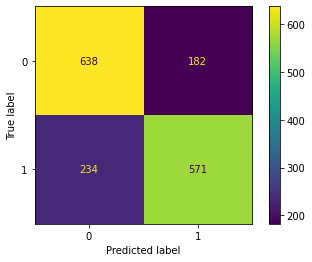

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
lmodel = LogisticRegression()
lmodel.fit(xtrain, ytrain)

ypred = lmodel.predict(xtest)

plot_confusion_matrix(lmodel,xtest, ytest)
confusion_matrix(ytest, ypred)
accuracy_score(ytest, ypred)